# Setup

In [8]:
# Data Wrangling
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Defining plot standard parameters
plt.rcParams.update(
    {
        "axes.labelcolor": "#595959",
        "axes.facecolor": (0, 0, 0, 0),
        "axes.grid": False,
        "axes.labelpad": 6,
        "axes.spines.right": False,
        "axes.spines.top": False,
        "figure.figsize": (9.25, 2.5),
        "figure.facecolor": (0, 0, 0, 0),
        "figure.dpi": 100,
        "legend.borderaxespad": 0,
        "legend.framealpha": None,
        "legend.fontsize": 8,
        "legend.loc": "upper center",
        "legend.title_fontsize": 9,
        "text.color": "#595959",
        "xtick.color": "#D9D9D9",
        "xtick.labelcolor": "#595959",
        "ytick.color": "#D9D9D9",
        "ytick.labelcolor": "#595959",
    }
)

# Loading Data

In [10]:
df = pd.read_csv("../data/processed/dataset_part_2.csv")

# Exploring Data

Task 1: Use the function catplot to plot FlightNumber vs LaunchSite, set the  parameter x  parameter to FlightNumber,set the  y to Launch Site and set the parameter hue to 'class'

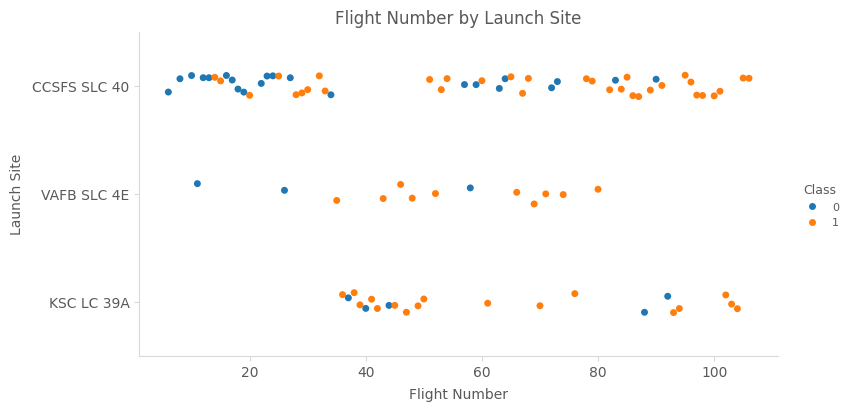

In [21]:
# Creating Figure
fig, ax = plt.subplots()

# Plotting the Ax
ax = sns.catplot(
    data=df,
    x="FlightNumber",
    y="LaunchSite",
    hue="Class",
    kind="strip",
    height=4, 
    aspect=2
)

ax.set_axis_labels("Flight Number", "Launch Site")

for axi in ax.axes.ravel():
    axi.spines["bottom"].set_color("#D9D9D9")
    axi.spines["left"].set_color("#D9D9D9")
plt.title("Flight Number by Launch Site")

# Close the figure to prevent plot duplication
plt.close(fig)

As Flight Number and Payload Mass increases, success rate also increases.

Launch Site CCAFS SLC 40 has most of the lower Flight Numbers, also concentrating less successful landing.

Task 2: Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value

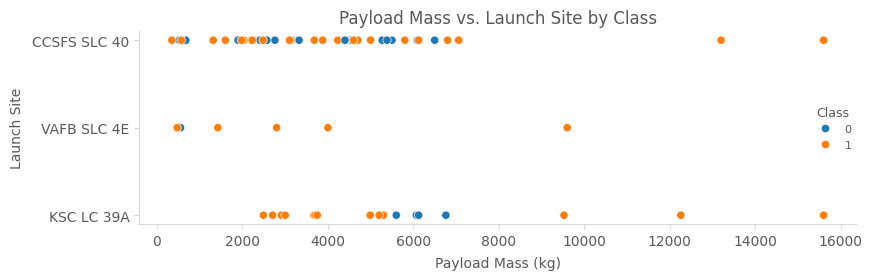

In [12]:
# Creating Figure
fig, ax = plt.subplots()

# Plotting
ax = sns.scatterplot(
    data=df,
    x="PayloadMass",
    y="LaunchSite",
    hue="Class"
)

# Customizing
ax.set_xlabel("Payload Mass (kg)")
ax.set_ylabel("Launch Site")
ax.spines["bottom"].set_color("#D9D9D9")
ax.spines["left"].set_color("#D9D9D9")
plt.title("Payload Mass vs. Launch Site by Class")
plt.legend(loc="center right", frameon=False, title="Class");

Launch Site VAFB-SLC does not have launches with heavy payload mass (greater than 10k) and high success rate.

Launch Site CCSFS SLC 40 has the most launches.

Task  3: Visualize the relationship between success rate of each orbit type

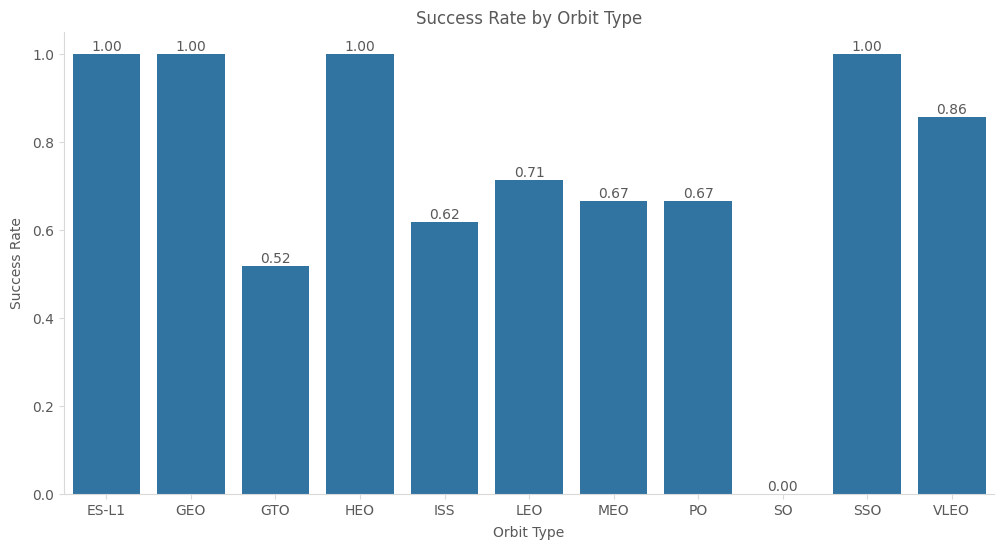

In [13]:
# Grouping by Orbit and calculating the mean success rate
plot_df = df.groupby("Orbit")["Class"].mean().reset_index()

# Creating Figure
fig, ax = plt.subplots(figsize=(12, 6))

# Plotting
sns.barplot(
    data=plot_df,
    x="Orbit",
    y="Class",
    ax=ax
)

# Customizing
ax.set_title("Success Rate by Orbit Type")
ax.set_xlabel("Orbit Type")
ax.set_ylabel("Success Rate")
ax.spines["bottom"].set_color("#D9D9D9")
ax.spines["left"].set_color("#D9D9D9")
ax.bar_label(ax.containers[0], fmt="%.2f");

Success Rate has a high variance across different Orbit Types. 

SO has a 0% success Rate and five Orbit Types have 100% (ES-L1, GEO, HEO, SSO, and VLEO). 

Task 4: Visualize the relationship between FlightNumber and Orbit type

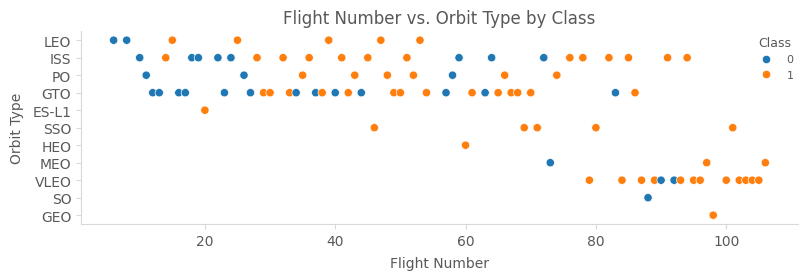

In [14]:
# Creating Figure
fig, ax = plt.subplots()

# Plotting
sns.scatterplot(
    data=df,
    x="FlightNumber",
    y="Orbit",
    hue="Class",
    ax=ax
)

# Customizing
ax.set_xlabel("Flight Number")
ax.set_ylabel("Orbit Type")
ax.spines["bottom"].set_color("#D9D9D9")
ax.spines["left"].set_color("#D9D9D9")
ax.set_title("Flight Number vs. Orbit Type by Class")
plt.legend(loc="best", frameon=False, title="Class");

Orbit Types success rate are influenced by Flight Numbers.

LEO, ISS, PO, and GTO had some of the lower (older) Flight Numbers that influenced their success on landings.

Task 5: Plot a scatter point chart with x axis to be Payload Mass and y axis to be the Orbit, and hue to be the class value

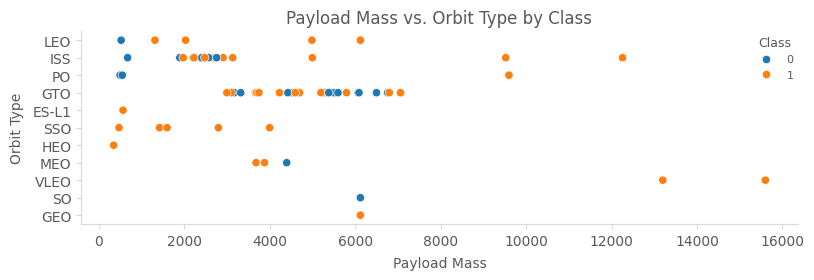

In [15]:
# Creating Figure
fig, ax = plt.subplots()

# Plotting
sns.scatterplot(
    data=df,
    x="PayloadMass",
    y="Orbit",
    hue="Class",
    ax=ax
)

# Customizing
ax.set_xlabel("Payload Mass")
ax.set_ylabel("Orbit Type")
ax.spines["bottom"].set_color("#D9D9D9")
ax.spines["left"].set_color("#D9D9D9")
ax.set_title("Payload Mass vs. Orbit Type by Class")
plt.legend(loc="best", frameon=False, title="Class");

Some Orbit Types are applicable for lower Payload Mass. 

The chart reinforces how high Payload Mass seems to be correlated with higher success rate on landings.

Task 6: Plot a line chart with x axis to be Year and y axis to be average success rate, to get the average launch success trend.

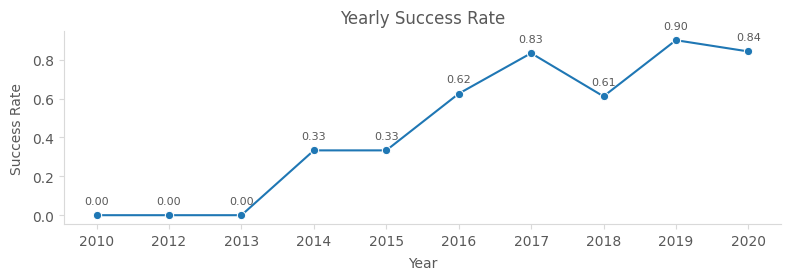

In [16]:
# A function to Extract years from the date 
year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
df["Date"] = year

# Grouping results by year
df_for_plot = df.groupby("Date")["Class"].mean().reset_index()

# Creating Figure
fig, ax = plt.subplots()

# Plotting
sns.lineplot(
    data=df_for_plot,
    x="Date",
    y='Class',
    ax=ax,
    marker='o'  # Optional: Add markers to the line
)

# Customizing
ax.set_xlabel("Year")
ax.set_ylabel("Success Rate")
ax.spines["bottom"].set_color("#D9D9D9")
ax.spines["left"].set_color("#D9D9D9")
ax.set_title("Yearly Success Rate")

# Adding Text
x, y = ax.lines[0].get_xydata().T
for xi, yi in zip(x, y):
    ax.text(
        xi, yi+.1, f"{yi:.2f}", size=8, ha="center", va="top"
    )

Success Rate is increasing over the years, indicating that accumulating know-how and implementing new technologies positively influences the success of landings.

# Feature Engineering

In [17]:
features = df[[
    "FlightNumber", 
    "PayloadMass", 
    "Orbit", 
    "LaunchSite", 
    "Flights", 
    "GridFins", 
    "Reused", 
    "Legs", 
    "LandingPad", 
    "Block", 
    "ReusedCount", 
    "Serial"
]]


Task 7 & 8: Create dummy variables to categorical columns and cast them as float64

In [18]:
features_one_hot = pd.get_dummies(features, columns=["Orbit", "LaunchSite", "LandingPad", "Serial"], dtype="float64")

In [19]:
display(features_one_hot)

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,6,6123.547647,1,False,False,False,1.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,8,525.000000,1,False,False,False,1.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10,677.000000,1,False,False,False,1.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,11,500.000000,1,False,False,False,1.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,12,3170.000000,1,False,False,False,1.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,102,15600.000000,2,True,True,True,5.0,12,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
86,103,15600.000000,3,True,True,True,5.0,13,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
87,104,15600.000000,6,True,True,True,5.0,12,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
88,105,15600.000000,3,True,True,True,5.0,12,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Export features_one_hot as a .csv

In [20]:
features_one_hot.to_csv("../data/processed/dataset_part_3.csv", index=False)